# Assignment 5 Wave Packets

based on https://www.compadre.org/picup/exercises/Exercise.cfm?A=WavePackets&S=6 by M.P. Kuchera

This Assignment should take you approximately 90 minutes to complete.

After completing this assignment, you will be able to...
* Graph static and animated waves. (Steps 1, 3, 4, 5, 6)
* Qualitatively describe a wave's position and wavelength as being well-defined or ill-defined. (Steps 2, 3, 4, 5)
* Construct a wave packet using superposition. (Step 3, 4, 6)
* Discuss a wave's group speed and phase speed. (Step 7)
* Apply the uncertainty principle to a wave. (Step 7)

## Step 1

Modern physics shows us that particles (massive and massless) have particle **and** wave properties. We can represent a particle as a traveling *wave packet*, with the *envelope* of the wave indicating where the particle is likely to be found. Let's investigate how to build a wave packet.

A wave can be described by $y(x) = A\cos{kx}$, where $k = \frac{2\pi}{\lambda}$ is the **wave number**, an inverse wavelength.

The two code cells below generate and plot such a wave. In the space below, describe what each line of code does. The comments below will help guide your reading. Then, execute the code.

[Add your answers here.]

In [1]:
from pylab import *
%matplotlib inline

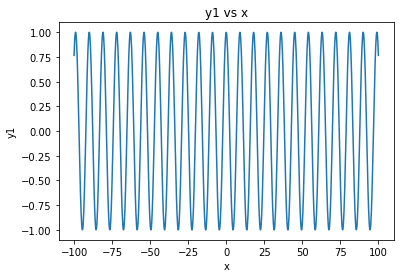

In [2]:
A1 = 1
x = linspace(-100,100,1000) # Look up https://numpy.org/doc/stable/reference/generated/numpy.linspace.html. 
# How many values of x will this produce? Why is this useful?

lam1 = 9
k1 = 2*pi/lam1 
y1 = A1*cos(k1*x) # How many values of y will this produce?

plot(x,y1)
xlabel('x')
ylabel('y1')
title('y1 vs x')
show() 

## Step 2

This wave has a well defined wavelength (we explicity defined it!), but what about position? Where would you say this wave "lives?" How does your answer relate to the uncertainty principle? 

[Add your answers here.]


## Step 3

Now, create a second wave with $A = 1$, $\lambda = 11$ and add it to the wave above (``y1 + y2``) to create a superposition of these two waves. Plot the resulting wave.

*Note:* For all of these plots, use the same x array that I created above, and use an amplitude of $A = 1$. 

In [ ]:
lam2 = ?? # wavelength
k = ?? # wave number
y2 = ?? # y2(x) values

y = y1+y2

plot(x,y)
show()

This wave looks more wave packet-y, but it repeats. How did our uncertainty in the wavelength of the resultant wave change? How about the uncertainty in position? 

[Add your answers here.]

## Step 4

Now use the code space below to make two more plots: 

 1) Superposition of 5 waves with $\lambda = 9,9.5,10,10.5,11$
 
 2) Superposition of 13 waves with $\lambda = 7,7.5,  8,   8.5,  9,   9.5, 10,  10.5, 11,  11.5, 12,  12.5, 13$
 
*Note:* You don't have to do it this way, but you can make your code efficient by using `linspace(9,11,5)` to generate a list `[ 9.0, 9.5, 10.0, 10.5, 11.0 ]`. Then, you can assemble your wave with a loop like:

``
y_new = 0
for wavelength in linspace(9,11,5):
    k = something based on wavelength
    y_new = y_new + A*cos(k*x)
11
``

This keeps track of the numbers and does all the adding for you!

In [ ]:
# place code for first plot here here

plot(x,y_new) # plot wave packet
show()

# place code for first plot here here


plot(x,y_new) # plot wave packet
show()

You should have something that nearly looks like a wave packet, except it still oscillates across all x. Discuss more generally how uncertainty in position and wavelength and uncertainty in momentum are related in these types of waves.

[Add your answer here.]

## Step 5

A wave packet which goes to zero as $x \rightarrow \pm\infty$ is more representative of particles that we encounter in nature. Multiplying our $\cos$ function by a **Gaussian** accomplishes this:

$$y(x) = Ae^{-2(\Delta\lambda \pi x/\lambda_0^2)^2}\cos{\frac{2\pi x}{\lambda_0}}$$

Plot this function for $\lambda_0 = 10$ and $\Delta \lambda = 0.58$.

*Note:* in python $x^2$ is `x**2`. The pylab library knows what $e$ is, or you can use the built-in ``exp()`` function. 

Describe the shape of this wave packet. How well-defined is its position? How well-defined is its wavelength?

[Add your answer here.]

In [ ]:
dlam = 0.58
lam0 = 10
y = 

plot(x,y)
show()

## Step 6

Let's go back to our beats wave, which is a combination of two cosine waves. We can have them evolve in time like

$$y(x,t) = A_1\cos{(k_1x - \omega_1t)} + A_2\cos{(k_2x - \omega_2t)}$$
where $\omega = 2\pi f$.

The speed of an individual wave with a specific frequency is $v = \lambda f = \omega/k$. This is called the *phase speed*, and it is the speed of one component of the wave packet. 

What does this indicate about the shape of the wave packet? Will it change with time?

[Add your answer here.]

Let's try it out! Complete the ys(x,t) function with $\lambda_1 = 11$, $\lambda_2 = 9$, $v_1 = 6$, $v_2 = 4$, $A_1 = A_2 = 1$

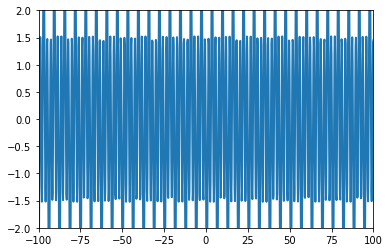

In [4]:
from matplotlib import animation
from IPython.display import HTML
# This is the new y(x) function
def ys(x,t):
    # put code here! Make sure the indentation of your lines is in line with this comment
    return A1*cos(k1*x-w1*t) + A2*cos(k2*x-w2*t) # y(x) values
    
# Do not edit anything below this comment! This is code for animated plotting.

# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(-100, 100), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    #print(i)
    x = linspace(-100,100,1000)
    y = ys(x,i/10)
    line.set_data(x, y)
    return line,    
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
#plt.plot(x,ys(x,0))
#anim.save('basic_animation.mp4', fps=30)#, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_jshtml())
#plt.show()

## Step 7

We know how to calculate the *phase speed*, but we can also quantify the speed of the wave packet, or *group velocity*.

$$v_{group} = \frac{d\omega}{dk}$$

With some math, we can see that 

$$v_{group} = v_{particle}$$

But this velocity has an uncertainty associated with it:

$$\Delta p_{x0} = m\Delta v_{x0}$$

Therefore, we can write our uncertainty in $x$ at a later time $t$ as:

$$\Delta x = \sqrt{(\Delta x_0)^2 + (\Delta v_{x0}t)^2}$$

Classically, putting this in terms of momentum, we have:

$$\Delta x = \sqrt{(\Delta x_0)^2 + (\Delta p_{x0}t/m)^2}$$

Use the uncertainty principle to put the right hand side only in terms of $\Delta x_0$. Format your mathematical work using $\LaTeX$.

[Add your math work here.]

Examine your resulting equation. What happens to $\Delta x$ when $\Delta x_0$ is very small? Very large?

[Add your answers here.]


# EXTRA CREDIT
## Step 8

Create an animated version of the Gaussian wave packet from Step 5.